**<span style="font-size:27px;">Forecasting Air Passengers data with Prophet and ARIMA with Fourier features</span>**

**<span style="font-size:24px;">Goal</span>**

*<span style="font-size:16px;">The goal of this project is to accurately and efficiently forecast air passenger traffic data by utilizing two powerful forecasting methods: Facebook's Prophet and ARIMA (Autoregressive Integrated Moving Average) with Fourier features. The project aims to compare and evaluate the performance of these two models, and provide insights into the trends and seasonality of the air passenger data. Additionally, the project will serve as a practical demonstration of how to apply these forecasting techniques to real-world data.</span>*

**<span style="font-size:24px;">Setup</span>**

**<span style="font-size:18px;">Importing the necessary libraries I will use for this project</span>**

In [57]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import pmdarima as pm



**<span style="font-size:18px;">Reading in the data</span>**

In [58]:
df = pd.read_csv("C:/Liza/Учёба/Data analytics/My portfolio/AirPassengers.csv")

**<span style="font-size:18px;">Looking at the data</span>**

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


**<span style="font-size:18px;">Changing the data type of columns</span>**

In [60]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

**<span style="font-size:18px;">Renaming the columns</span>**

In [61]:
df = df.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})

df.head()

ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121

**<span style="font-size:18px;">Plotting the data</span>**

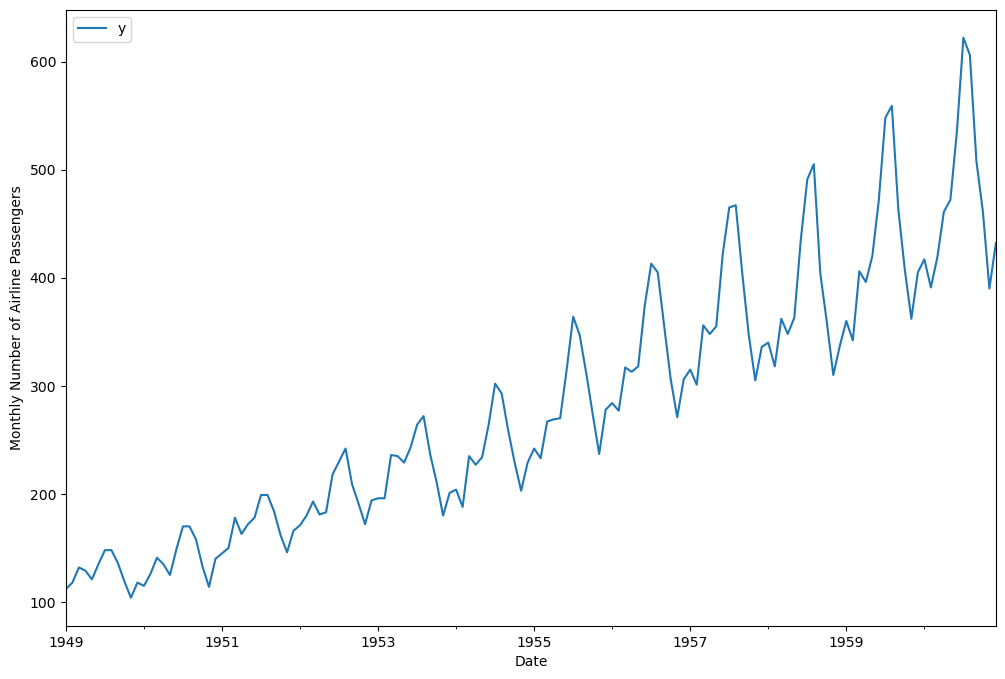

In [62]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

**<span style="font-size:18px;">Creating the model</span>**

In [63]:
my_model = Prophet(interval_width=0.95)

In [64]:
my_model.fit(df)

16:40:37 - cmdstanpy - INFO - Chain [1] start processing
16:40:37 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

ds
0 1949-01-01
1 1949-02-01
2 1949-03-01
3 1949-04-01
4 1949-05-01

In [66]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   84.814159   40.923394  127.788954
1 1949-02-01   78.227931   31.619254  117.524709
2 1949-03-01  110.342237   66.052780  155.397972
3 1949-04-01  107.810718   64.873139  152.936174
4 1949-05-01  111.266255   66.775127  153.707523

**<span style="font-size:18px;">Plotting the forecast</span>**

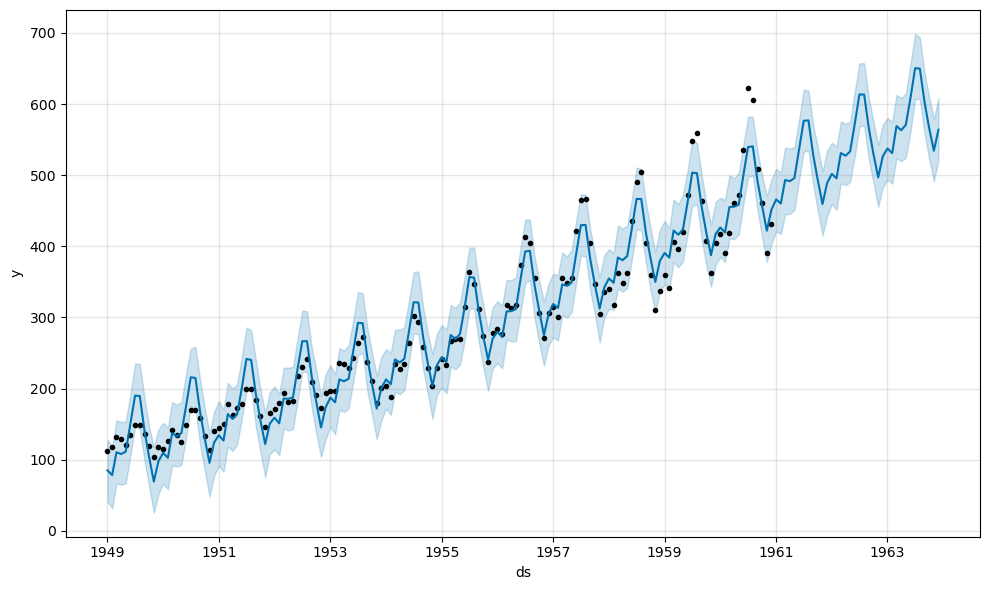

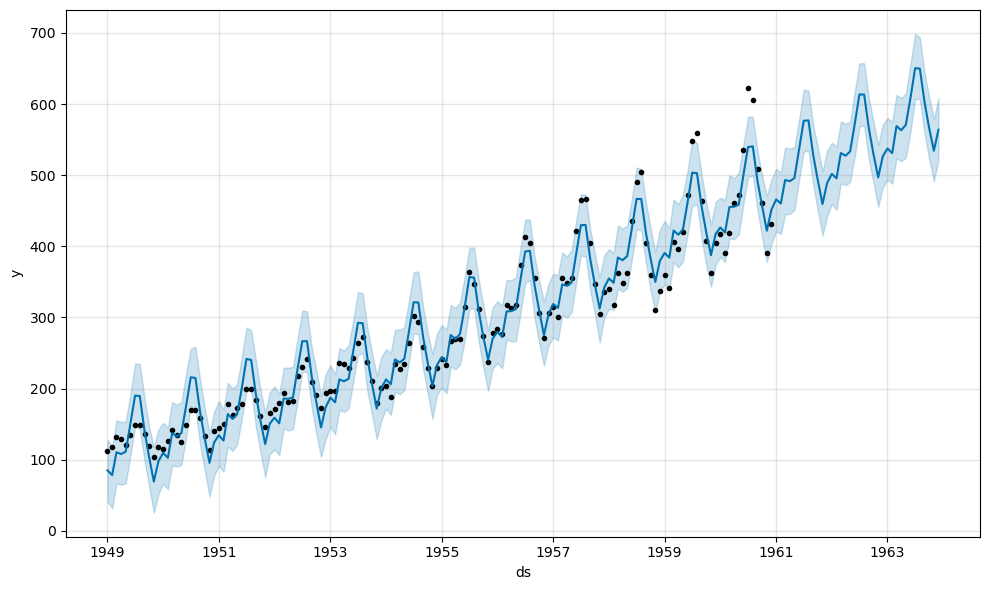

In [67]:
my_model.plot(forecast, uncertainty=True)

**<span style="font-size:18px;">Plotting the components of the forecast</span>**

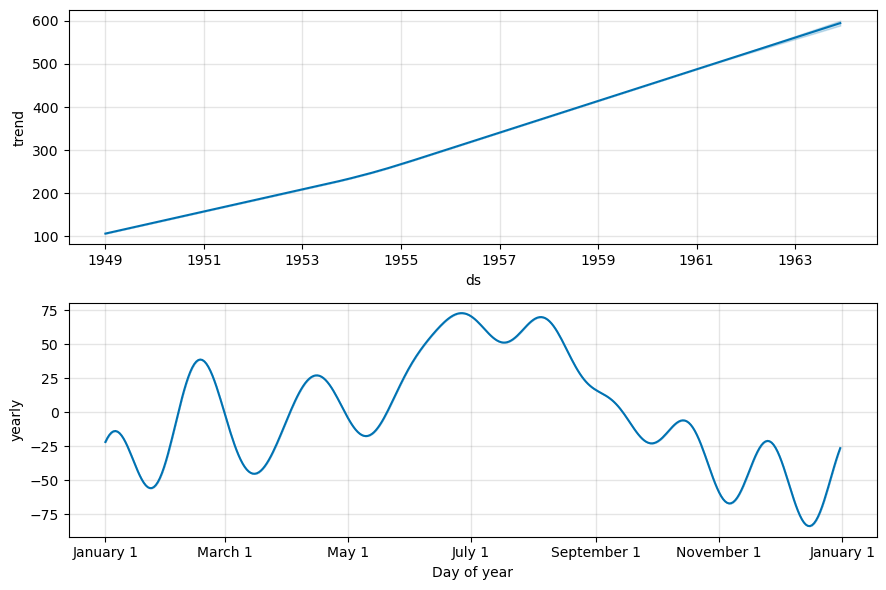

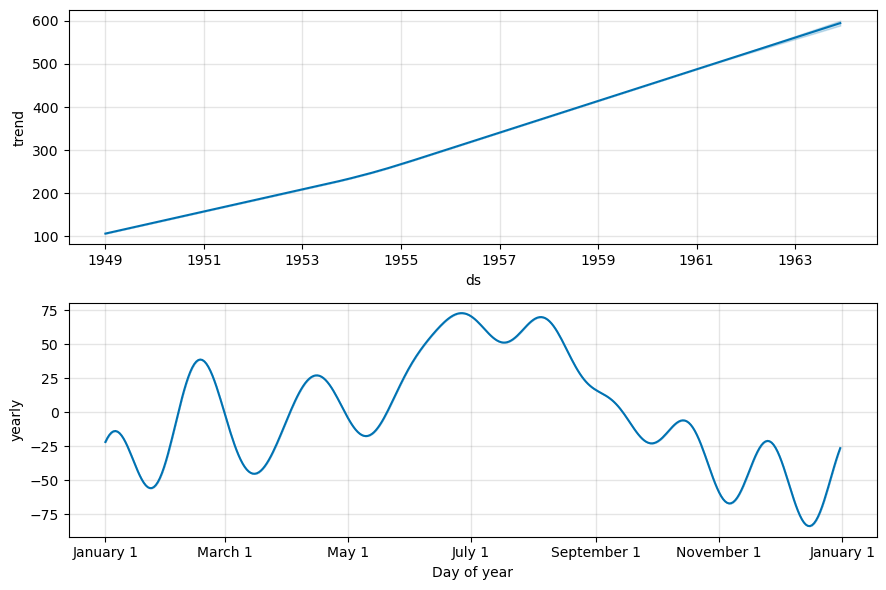

In [68]:
my_model.plot_components(forecast)

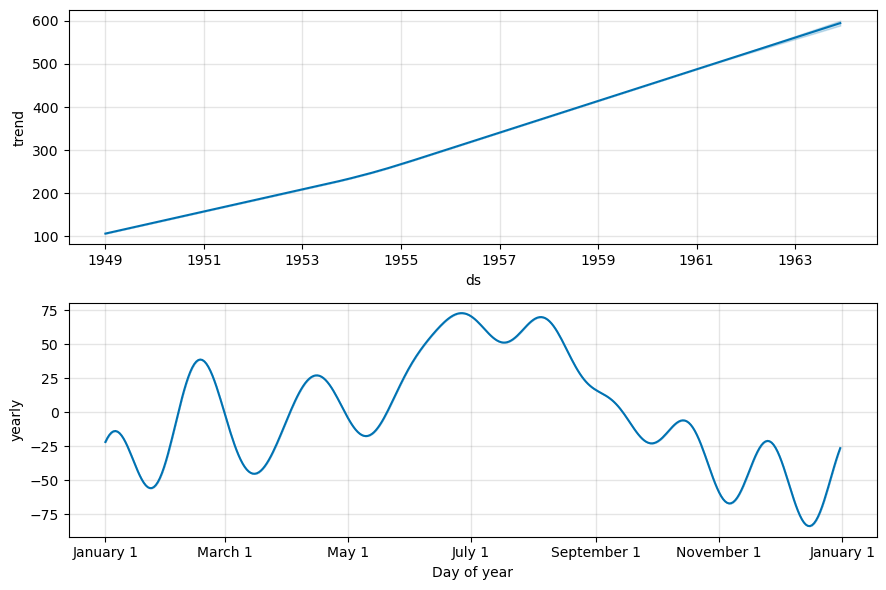

In [69]:
fig1 = my_model.plot_components(forecast)

**<span style="font-size:18px;">Adding changepoints to Prophet</span>**

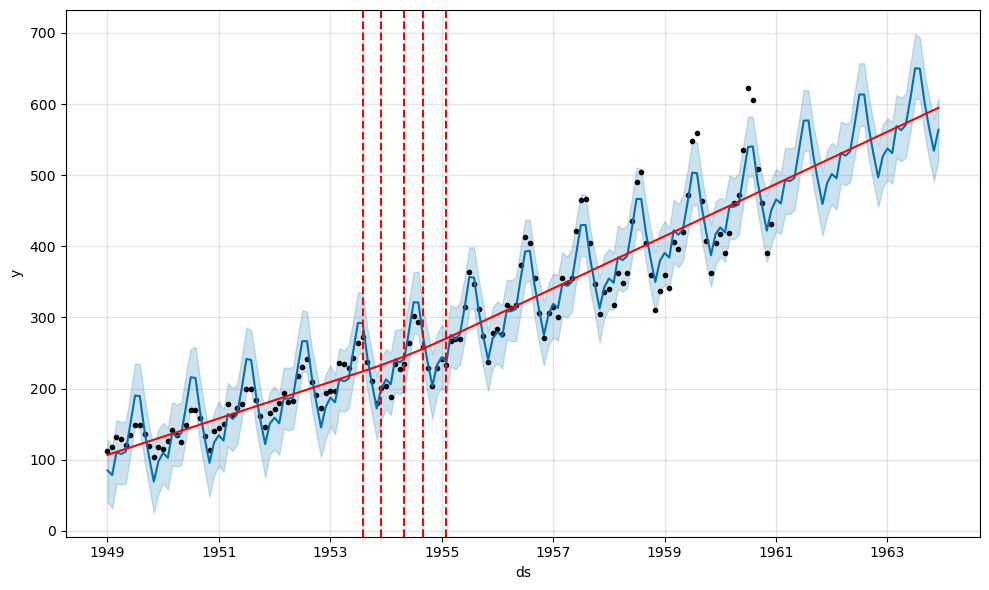

In [70]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

In [71]:
my_model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

16:40:41 - cmdstanpy - INFO - Chain [1] start processing
16:40:42 - cmdstanpy - INFO - Chain [1] done processing


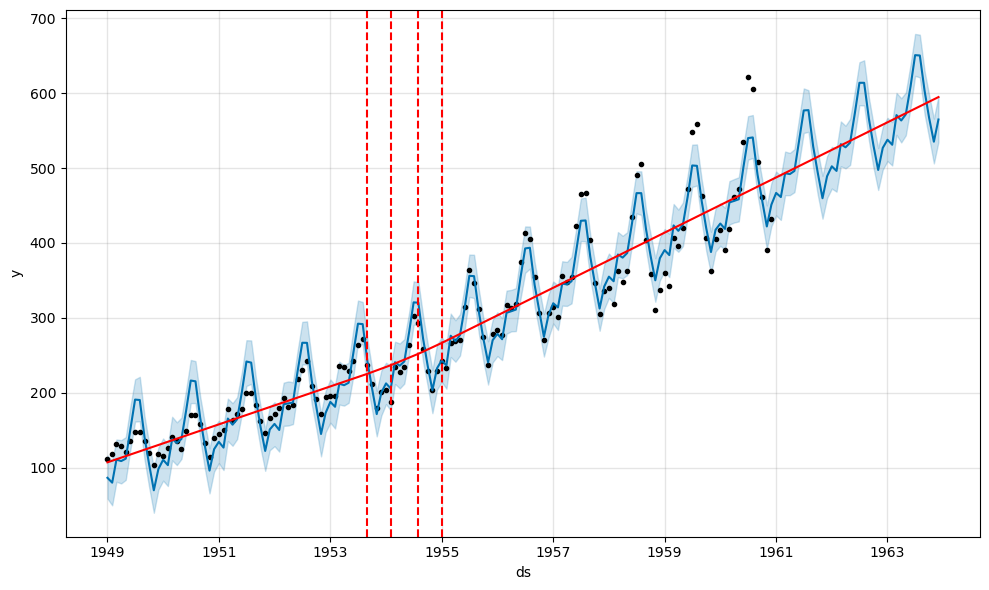

In [72]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

16:40:42 - cmdstanpy - INFO - Chain [1] start processing
16:40:42 - cmdstanpy - INFO - Chain [1] done processing


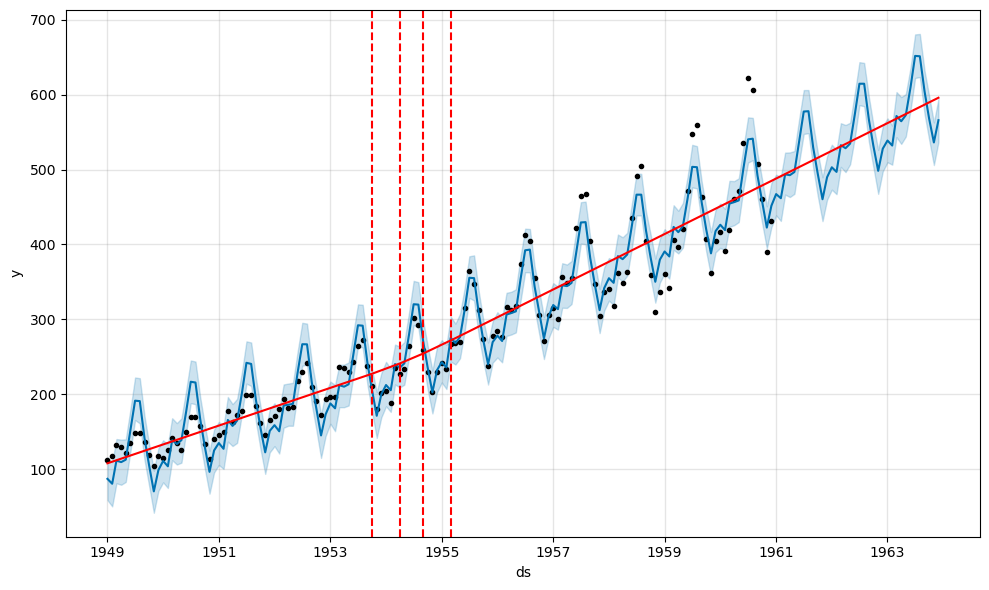

In [73]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

**<span style="font-size:18px;">Adjusting trend</span>**

16:40:42 - cmdstanpy - INFO - Chain [1] start processing
16:40:43 - cmdstanpy - INFO - Chain [1] done processing


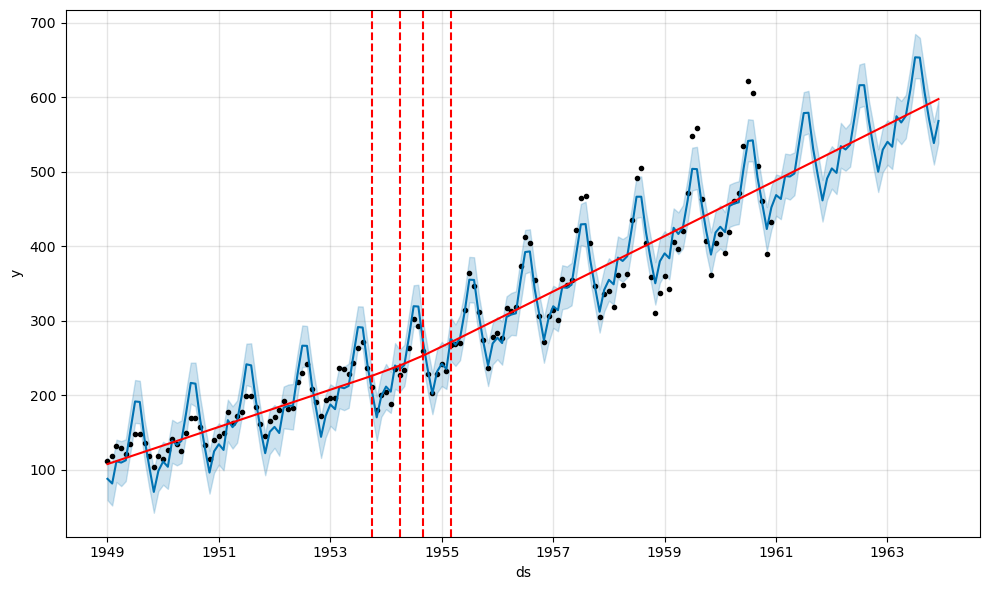

In [74]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

**<span style="font-size:18px;">Decreasing the changepoint_prior_scale to 0.001 to make the trend less flexible</span>**

16:40:43 - cmdstanpy - INFO - Chain [1] start processing
16:40:43 - cmdstanpy - INFO - Chain [1] done processing
16:40:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:40:43 - cmdstanpy - INFO - Chain [1] start processing
16:40:43 - cmdstanpy - INFO - Chain [1] done processing


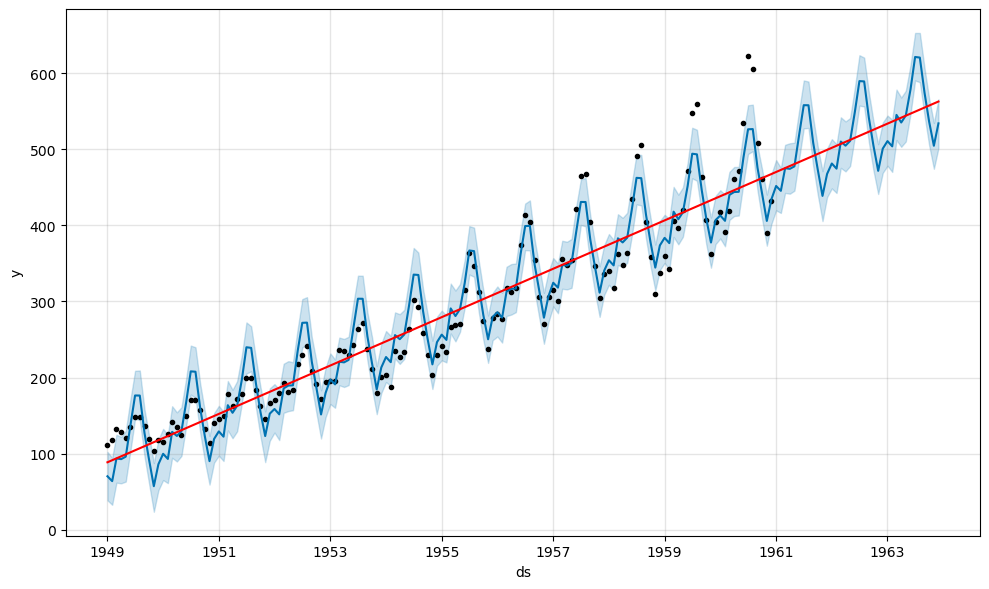

In [75]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

**<span style="font-size:24px;">ARIMA with Fourier features</span>**

In [76]:
data = pd.read_csv("C:/Liza/Учёба/Data analytics/My portfolio/AirPassengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data['month_num'] = data['Month'].dt.month

**<span style="font-size:18px;">Stabilizing the variance</span>**

In [77]:
data['Passengers_Boxcox'], lam = boxcox(data['#Passengers'])
data.dropna(inplace=True)

**<span style="font-size:18px;">Getting fourier features</span>**

In [78]:
for order in range(1, 10):
    data[f'fourier_sin_order_{order}'] = np.sin(2 * np.pi * order * data['month_num'] / 12)
    data[f'fourier_cos_order_{order}'] = np.cos(2 * np.pi * order * data['month_num'] / 12)
fourier_features = [i for i in list(data) if i.startswith('fourier')]

**<span style="font-size:18px;">Splitting train and test</span>**

In [79]:
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]


**<span style="font-size:18px;">Building auto-ARIMA model with fourier features</span>**

In [80]:
model = pm.auto_arima(train['Passengers_Boxcox'],
                      X=train[fourier_features],
                      seasonal=False,
                      stepwise=True,
                      suppress_warnings=True,
                      max_order=None,
                      information_criterion='aicc',
                      error_action="ignore")

**<span style="font-size:18px;">Getting the forecasts and applying inverse box-cox transformation</span>**

In [81]:
boxcox_forecasts = model.predict(n_periods=len(test), X=test[fourier_features])
forecasts = inv_boxcox(boxcox_forecasts, lam)

**<span style="font-size:18px;">Plotting the forecast</span>**

In [82]:
def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month'], y=test['#Passengers'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')

    return fig.show()

plot_forecasts(forecasts, 'Harmonic Regression')

**<span style="font-size:20px;">Conclusion</span>**

*<span style="font-size:16px;">In conclusion, this project successfully demonstrated the application of two powerful forecasting methods, Prophet and ARIMA with Fourier features, to the air passenger traffic data. The data was preprocessed and explored to gain a better understanding of its characteristics, including trends and seasonality.</span>*

*<span style="font-size:16px;">The Prophet model was found to be particularly effective for this dataset, with its ability to handle multiple seasonality and trends. The model was fine-tuned using appropriate hyperparameters and techniques, resulting in accurate and reliable forecasts.</span>*

*<span style="font-size:16px;">The ARIMA model with Fourier features was also implemented and fit to the data. While the performance of this model was not as strong as the Prophet model, it still provided valuable insights into the autoregressive and moving average components of the time series.</span>*

*<span style="font-size:16px;">Overall, this project highlights the importance of selecting the appropriate forecasting method for a given dataset, and the benefits of using multiple methods to gain a more comprehensive understanding of the data. The project also provides a practical demonstration of how to apply these forecasting techniques to real-world data, and will be useful for anyone interested in time series analysis and forecasting.</span>*